<a id='np'></a>
# Numpy arrays
- numpy provides a standardized data structures for homogeous arrays
  - numpy.ndarray()
- facilitates efficient computation   
  - vectorized operations
- numpy is the foundation for many other, more specialized, libraries in Python:
  - pandas for working with tables 
  - geopandas for working with vector layers
  - xarray and rasterio for working with rasters 

[Create](#np-create)  
[Import](#np-import)  
[Explore](#np-explore)  
[Transform](#np-transform)  
[Select](#np-select)   
[Filter](#np-filter)  
[Aggregate](#np-aggregate)   
[Missing Values](#np-missing)     
[Visualize](#np-visualize)  

## Initialize

### libraries

In [1]:
import os
import calendar
import requests

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [2]:
np.__version__

'1.24.1'

### directories

In [3]:
home_dir = home_dir = os.path.expanduser("~")

work_dir = os.path.join(home_dir, 'kr', 'py')
data_dir = os.path.join(home_dir, 'kr', 'py', 'data')
save_dir = os.path.join(home_dir, 'kr', 'py', 'save')

In [4]:
os.chdir(work_dir)
os.getcwd()

'/Users/rkforest/kr/py'

### parameters

In [5]:
# shows result of cell without needing print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

In [6]:
sns.set(font_scale=1.5, style="darkgrid")

In [7]:
print(plt.rcParams['axes.titlesize'])
print(plt.rcParams['axes.labelsize'])
print(plt.rcParams['xtick.labelsize'])
print(plt.rcParams['ytick.labelsize'])

18.0
18.0
16.5
16.5


In [8]:
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['figure.dpi'] = 144
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

### constants

In [9]:
months = [month for month in calendar.month_abbr if month];

In [10]:
celsius_to_fahr = 1.8

1.8

<a id='np-create'></a>
## Create

[Return to Start of Notebook](#np)  

### 3-dimensions
- NumPy reports the shape of 3D arrays in the order layers, rows, columns.

In [11]:
a = np.array([[[1,2,3],
               [1,2,3]],
              [[1,2,3],
               [1,2,3]]])
a.ndim

3

In [12]:
a.shape

(2, 2, 3)

<a id='np-import'></a>
## Import

[Return to Start of Notebook](#np)  

- np.loadtxt  (if no missing values)
- np.genfromtxt

### url

In [13]:
giss_url = "https://data.giss.nasa.gov/gistemp/tabledata_v4/"

'https://data.giss.nasa.gov/gistemp/tabledata_v4/'

In [14]:
file_id = "GLB"
file_name = file_id + ".Ts+dSST.csv"
file_url = giss_url + file_name

'https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv'

In [15]:
file_path = os.path.join(data_dir, file_name)
file_path

'/Users/rkforest/kr/py/data/GLB.Ts+dSST.csv'

In [16]:
r = requests.get(file_url)
open(file_path, 'wb').write(r.content)

12518

In [17]:
glb = np.genfromtxt(file_path,
                    skip_header=2,
                    usecols=(1,2,3,4,5,6,7,8,9,10,11,12),
                    delimiter = ",");

In [18]:
yrs = np.loadtxt(file_path,
                 skiprows=2,
                 usecols=(0),
                 delimiter = ",");

In [19]:
file_id = "NH"
file_name = file_id + ".Ts+dSST.csv"
file_url = giss_url + file_name
file_path = os.path.join(data_dir, file_name)

'/Users/rkforest/kr/py/data/NH.Ts+dSST.csv'

In [20]:
r = requests.get(file_url)
open(file_path, 'wb').write(r.content)

12561

In [21]:
nh = np.genfromtxt(file_path,
                    skip_header=2,
                    usecols=(1,2,3,4,5,6,7,8,9,10,11,12),
                    delimiter = ",");

In [22]:
file_id = "SH"
file_name = file_id + ".Ts+dSST.csv"
file_url = giss_url + file_name
file_path = os.path.join(data_dir, file_name)

'/Users/rkforest/kr/py/data/SH.Ts+dSST.csv'

In [23]:
r = requests.get(file_url)
open(file_path, 'wb').write(r.content)

12545

In [24]:
sh = np.genfromtxt(file_path,
                    skip_header=2,
                    usecols=(1,2,3,4,5,6,7,8,9,10,11,12),
                    delimiter = ",");

<a id='np-explore'></a>
## Explore

[Return to Start of Notebook](#np)  

### ndim

In [25]:
glb.ndim

2

### shape

In [26]:
glb.shape

(143, 12)

In [27]:
rows = glb.shape[0]
cols = glb.shape[1]

12

In [28]:
yrs.shape

(143,)

### size

In [29]:
glb.size

1716

### dtype

In [30]:
glb.dtype

dtype('float64')

<a id='np-missing'></a>
## Missing Values

[Return to Start of Notebook](#np)  

### np.isnan()

In [31]:
np.isnan(glb)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

### np.nansum(np.isnan())

In [32]:
np.nansum(np.isnan(glb))

0

### ~np.isnan()
- will flatten if doing entire array
- remove rows or columns separately

In [33]:
glbx = glb[~np.isnan(glb)]
np.nansum(np.isnan(glbx))

0

In [34]:
glbx.ndim

1

In [35]:
filt = ~np.isnan(glb).any(axis=1)
glbx = glb[filt]
np.nansum(np.isnan(glbx))

0

In [36]:
glbx.ndim

2

In [37]:
filt = ~np.isnan(nh).any(axis=1)
nhx = nh[filt]

array([[-0.36, -0.51, -0.23, ..., -0.32, -0.43, -0.4 ],
       [-0.31, -0.22, -0.04, ..., -0.44, -0.37, -0.24],
       [ 0.26,  0.21,  0.02, ..., -0.52, -0.34, -0.69],
       ...,
       [ 1.57,  1.7 ,  1.65, ...,  1.21,  1.6 ,  1.23],
       [ 1.26,  0.95,  1.2 , ...,  1.3 ,  1.3 ,  1.17],
       [ 1.24,  1.16,  1.42, ...,  1.31,  1.08,  1.08]])

In [38]:
filt = ~np.isnan(sh).any(axis=1)
shx = sh[filt]

array([[ 0.01,  0.04,  0.07, ..., -0.14,  0.01,  0.06],
       [-0.07, -0.05,  0.1 , ...,  0.01,  0.01,  0.1 ],
       [ 0.08,  0.08,  0.08, ...,  0.04,  0.  , -0.06],
       ...,
       [ 0.74,  0.77,  0.67, ...,  0.57,  0.6 ,  0.39],
       [ 0.36,  0.32,  0.56, ...,  0.69,  0.56,  0.57],
       [ 0.57,  0.61,  0.67, ...,  0.62,  0.35,  0.52]])

<a id='np-transform'></a>
## Transform

[Return to Start of Notebook](#np)  

### flatten

In [39]:
glb.shape

(143, 12)

In [40]:
glb1d = glb.flatten() # required for histogram
glb1d.shape

(1716,)

### reshape

In [41]:
glb2d = glb1d.reshape((rows,cols));

### transpose

In [42]:
glbT = glb.T

array([[-0.18, -0.19,  0.17, ...,  1.16,  0.81,  0.91],
       [-0.24, -0.13,  0.14, ...,  1.24,  0.64,  0.89],
       [-0.08,  0.04,  0.05, ...,  1.17,  0.89,  1.05],
       ...,
       [-0.23, -0.21, -0.23, ...,  0.89,  1.  ,  0.97],
       [-0.21, -0.18, -0.16, ...,  1.1 ,  0.93,  0.72],
       [-0.17, -0.06, -0.36, ...,  0.81,  0.87,  0.8 ]])

### add dimension

In [43]:
glb.ndim

2

In [44]:
glb3d = glb[:, np.newaxis]
glb3d.ndim

3

### .astype

### vectorized operations

In [45]:
glbf = glb * celsius_to_fahr

array([[-0.324, -0.432, -0.144, ..., -0.414, -0.378, -0.306],
       [-0.342, -0.234,  0.072, ..., -0.378, -0.324, -0.108],
       [ 0.306,  0.252,  0.09 , ..., -0.414, -0.288, -0.648],
       ...,
       [ 2.088,  2.232,  2.106, ...,  1.602,  1.98 ,  1.458],
       [ 1.458,  1.152,  1.602, ...,  1.8  ,  1.674,  1.566],
       [ 1.638,  1.602,  1.89 , ...,  1.746,  1.296,  1.44 ]])

### .concatenate

In [46]:
mth = np.concatenate((glbx,nhx,shx), axis=0)

array([[-0.18, -0.24, -0.08, ..., -0.23, -0.21, -0.17],
       [-0.19, -0.13,  0.04, ..., -0.21, -0.18, -0.06],
       [ 0.17,  0.14,  0.05, ..., -0.23, -0.16, -0.36],
       ...,
       [ 0.74,  0.77,  0.67, ...,  0.57,  0.6 ,  0.39],
       [ 0.36,  0.32,  0.56, ...,  0.69,  0.56,  0.57],
       [ 0.57,  0.61,  0.67, ...,  0.62,  0.35,  0.52]])

In [47]:
mth.shape

(429, 12)

<a id='np-select'></a>
## Select

[Return to Start of Notebook](#np)  

### rows

In [48]:
glb[0] # first row
glb[-1] # last row
glb[1:3] # range of rows
glb[:3] # from beginning
glb[1:] # to end

array([[-0.19, -0.13,  0.04, ..., -0.21, -0.18, -0.06],
       [ 0.17,  0.14,  0.05, ..., -0.23, -0.16, -0.36],
       [-0.29, -0.36, -0.12, ..., -0.11, -0.24, -0.11],
       ...,
       [ 1.16,  1.24,  1.17, ...,  0.89,  1.1 ,  0.81],
       [ 0.81,  0.64,  0.89, ...,  1.  ,  0.93,  0.87],
       [ 0.91,  0.89,  1.05, ...,  0.97,  0.72,  0.8 ]])

### columns

In [49]:
glb[:,0] # single column

array([-0.18, -0.19,  0.17, -0.29, -0.12, -0.58, -0.43, -0.71, -0.33,
       -0.08, -0.41, -0.33, -0.29, -0.81, -0.52, -0.4 , -0.21, -0.14,
       -0.02, -0.16, -0.36, -0.21, -0.17, -0.23, -0.63, -0.34, -0.28,
       -0.43, -0.44, -0.72, -0.42, -0.62, -0.25, -0.4 ,  0.05, -0.2 ,
       -0.12, -0.58, -0.48, -0.21, -0.24, -0.04, -0.33, -0.28, -0.23,
       -0.38,  0.2 , -0.27, -0.02, -0.45, -0.29, -0.1 ,  0.16, -0.23,
       -0.21, -0.33, -0.27, -0.07,  0.08, -0.05,  0.  ,  0.18,  0.3 ,
       -0.01,  0.36,  0.1 ,  0.15, -0.06,  0.07,  0.07, -0.26, -0.34,
        0.11,  0.07, -0.24,  0.13, -0.13, -0.09,  0.39,  0.08,  0.  ,
        0.07,  0.05, -0.03, -0.09, -0.08, -0.19, -0.07, -0.25, -0.11,
        0.08, -0.03, -0.22,  0.29, -0.1 ,  0.1 , -0.03,  0.18,  0.06,
        0.08,  0.3 ,  0.53,  0.05,  0.53,  0.31,  0.22,  0.26,  0.32,
        0.56,  0.12,  0.41,  0.42,  0.47,  0.34,  0.26,  0.52,  0.24,
        0.29,  0.58,  0.48,  0.25,  0.45,  0.77,  0.75,  0.58,  0.74,
        0.56,  1.02,

In [50]:
glb[:,0:2]; # columns range

In [51]:
glb[:,(0,1,2)]; # specified columns

### rows and columns

In [52]:
glb[:2, :2]  ## 1st to 2nd rows, 2nd to last columns

array([[-0.18, -0.24],
       [-0.19, -0.13]])

### single value

In [53]:
glb[0][0] 
glb[0,0]

-0.18

### copy

- modifying selections also modifies original array
- prevent using copy

<a id='np-filter'></a>
## Filter
Numpy arrays can be subsetted using corresponding boolean arrays, which are also known as filters or masks.   
Any boolean array with the corresponding shape as the original array can function as a mask. 

[Return to Start of Notebook](#np)  

In [54]:
filt = glb > 1
filt = (glb > 1) & (glb < 1.1)
#filt = (glb > 1) | (glb < -1)
#filt = ~ (glb > -0.5)
glb[filt]

array([1.02, 1.09, 1.06, 1.01, 1.02, 1.01, 1.01, 1.01, 1.09, 1.02, 1.05])

In [55]:
filt = glb > 1
glb[filt].mean()

1.1170833333333334

<a id='np-aggregate'></a>
## Aggregate

[Return to Start of Notebook](#np)  

### np.mean

In [56]:
monthly_avg = np.mean(glbx,axis=0).round(3) # only if nan removed

array([0.058, 0.064, 0.08 , 0.056, 0.047, 0.032, 0.056, 0.054, 0.058,
       0.084, 0.077, 0.052])

### np.nanmean

In [57]:
np.nanmean(glb).round(3) # if contains nan

0.06

### .any()

In [58]:
(glb > 1.).any()

True

### .all()

In [59]:
(glb > -1).all()

True

### .sum()

In [60]:
(glb > 1).sum()

24

### axis
- axis = 0 to summarize columns  (eliminate row dimension)
- axis = 1 to summarize rows  (eliminate column dimension)

In [61]:
year_avg = np.nanmean(glb,axis=1); # avg each row

In [62]:
month_mean = np.nanmean(glb,axis=0); # avg each col

In [63]:
month_max = np.nanmax(glb,axis=0); # avg each col
month_min = np.nanmin(glb,axis=0); # avg each col

<a id='np-visualize'></a>
## Visualize

[Return to Start of Notebook](#np)  

### bar plot

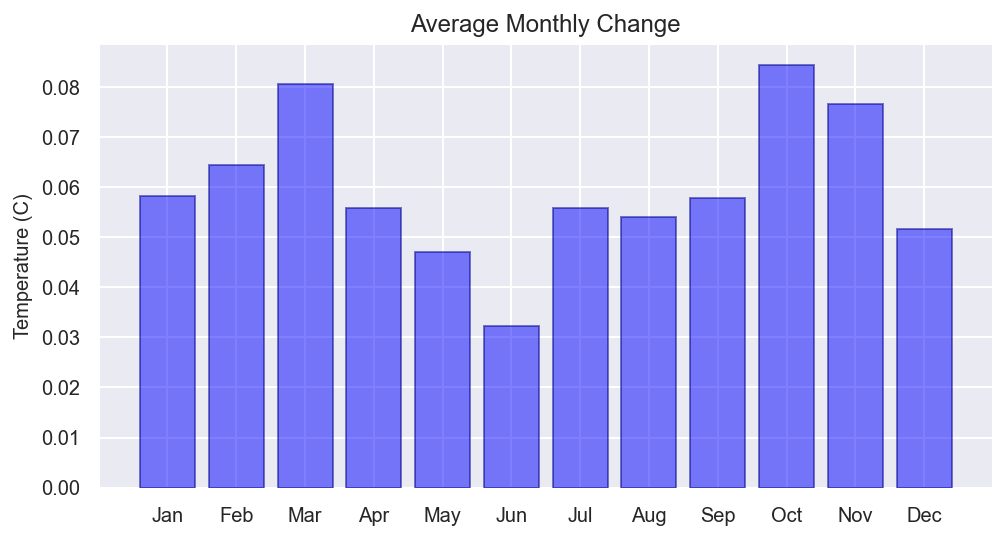

In [64]:
fig, ax = plt.subplots()

ax.bar(x = months,
       height = month_mean,
       color = 'blue',
       edgecolor = 'darkblue',
       alpha=0.5)

ax.set(title = "Average Monthly Change",
           xlabel = "",
           ylabel = "Temperature (C)")

plt.show()

### scatter plot

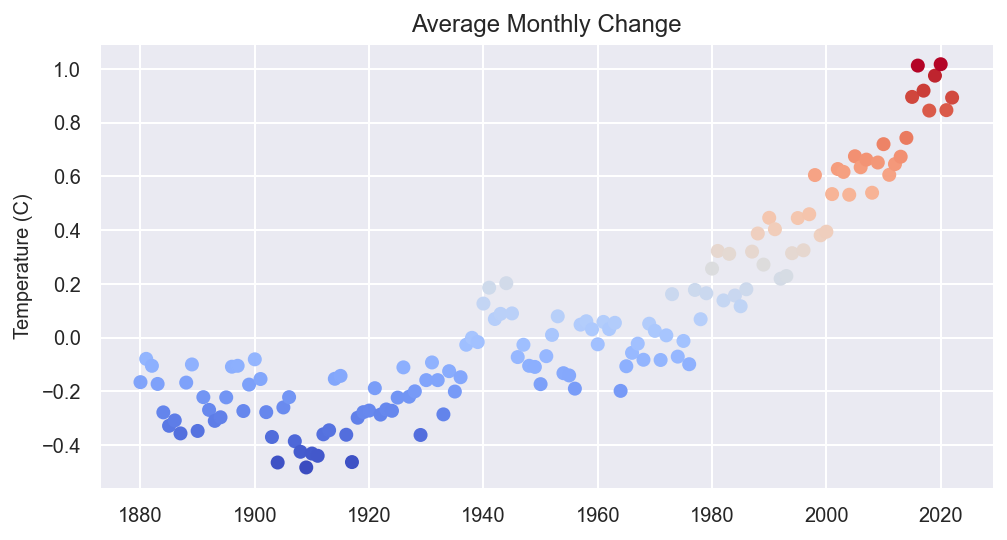

In [65]:
fig, ax = plt.subplots()

ax.scatter(x = yrs,
           y=year_avg,
           c=year_avg,
           cmap='coolwarm')

ax.set(title = "Average Monthly Change",
           xlabel = "",
           ylabel = "Temperature (C)")

plt.show()

### line plot

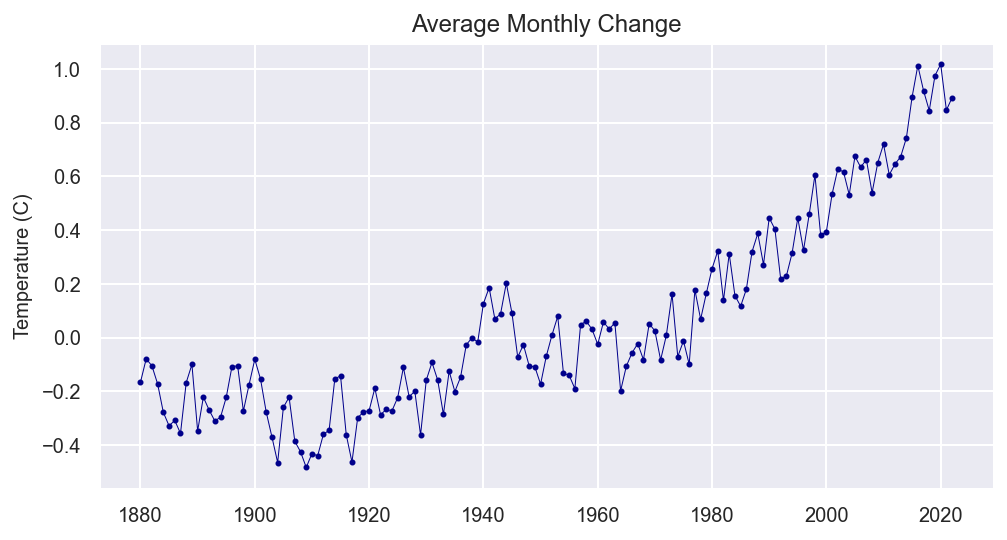

In [66]:
fig, ax = plt.subplots()

ax.plot(yrs,
        year_avg,
        lw = 0.5,
        marker = 'o',
        markersize = 2,
        color = 'darkblue')

ax.set(title = "Average Monthly Change",
           xlabel = "",
           ylabel = "Temperature (C)")

plt.show()

### histogram

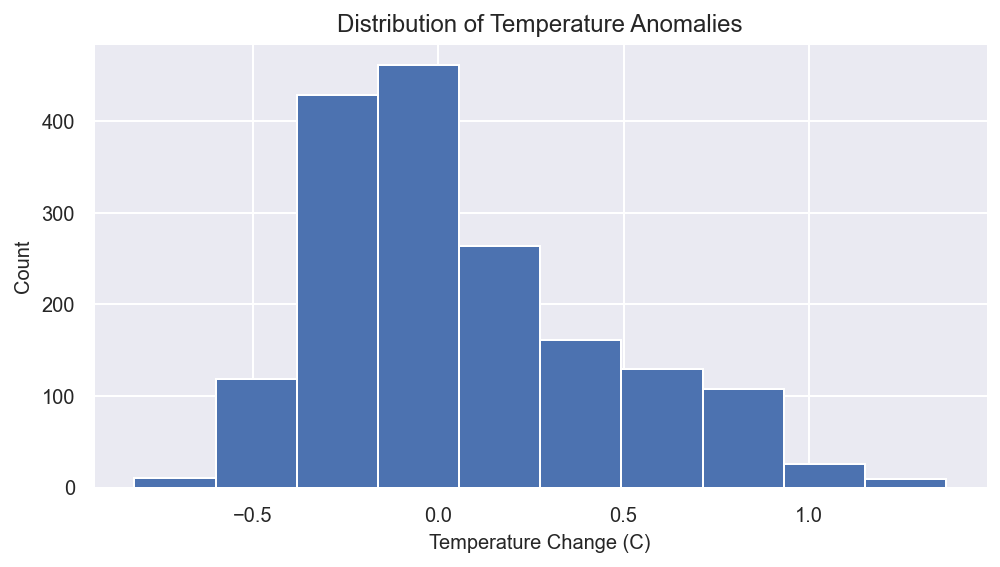

In [67]:
fig, ax = plt.subplots()

ax.hist(glb1d)

ax.set(title = "Distribution of Temperature Anomalies",
       xlabel = "Temperature Change (C)",
       ylabel = "Count")

plt.show()

### pcolormesh

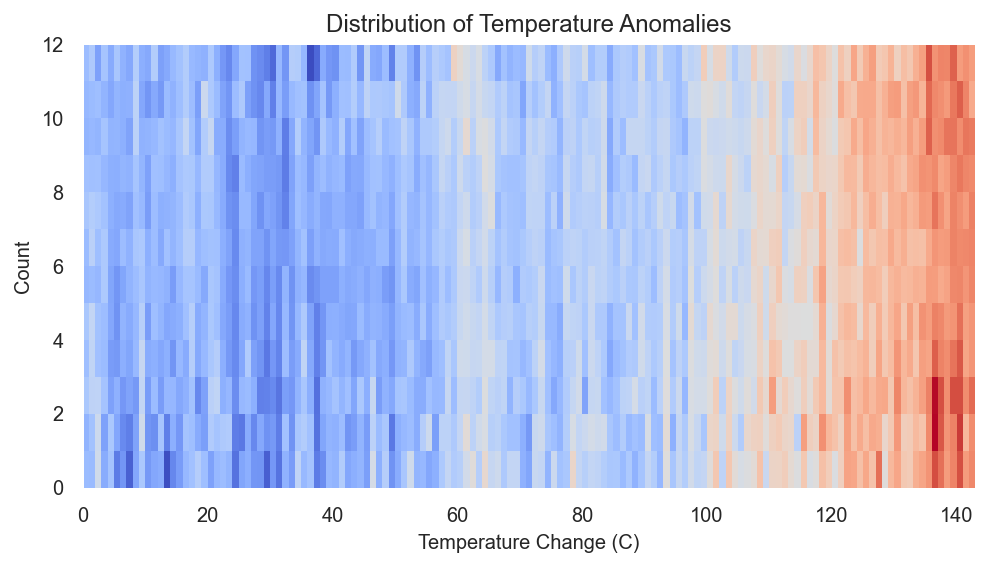

In [68]:
fig, ax = plt.subplots()

ax.grid(False)
ax.pcolormesh(glb.T,cmap='coolwarm')
ax.set(title = "Distribution of Temperature Anomalies",
       xlabel = "Temperature Change (C)",
       ylabel = "Count")

plt.show()

### facet

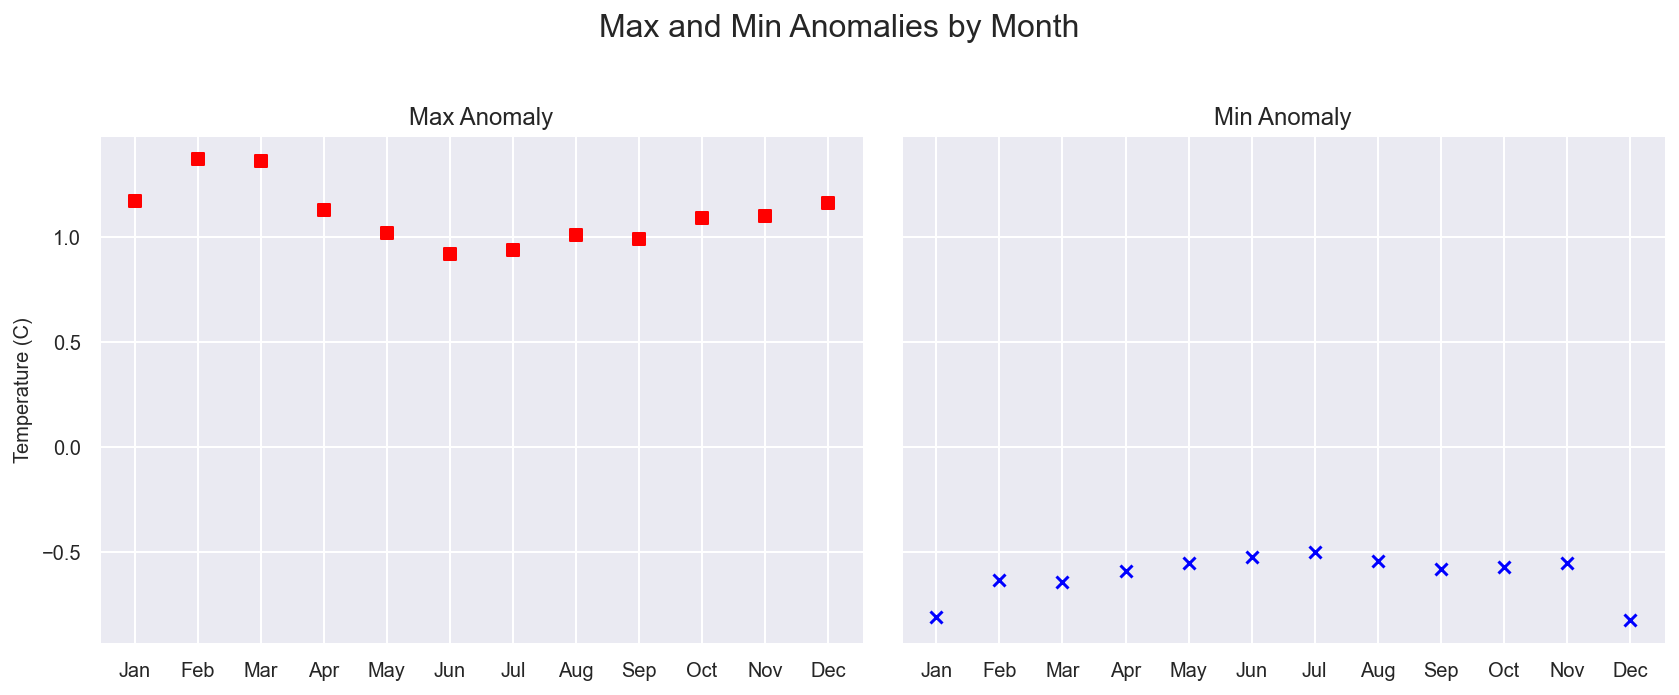

In [69]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12, 5), sharey=True)

fig.suptitle("Max and Min Anomalies by Month", fontsize = 16)

ax1.scatter(x = months,
            y = month_max,
            color = 'red',
            marker=',')

ax1.set(title = "Max Anomaly",
           xlabel = "",
           ylabel = "Temperature (C)")

ax2.scatter(x = months,
            y = month_min,
            color = 'blue',
            marker='x')

ax2.set(title = "Min Anomaly",
           xlabel = "",
           ylabel = "")

plt.tight_layout()

plt.show()